In [1]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
encoder = LabelEncoder()
df['species'] = encoder.fit_transform(df['species'])

In [6]:
X=df.drop('species',axis=1)
y=df['species']
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [8]:
clf = LogisticRegression(multi_class='multinomial')
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.9666666666666667


C:\Users\sunil\LEARNING\Machine_Learning\myenv\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [10]:
pd.DataFrame(confusion_matrix(y_test,y_pred))

,0,1,2
0,14,0,0
1,0,7,1
2,0,0,8


In [11]:
# prediction
query = np.array([[5.1,3.5,1.4,0.2]])
clf.predict_proba(query)

C:\Users\sunil\LEARNING\Machine_Learning\myenv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[9.74537503e-01, 2.54624377e-02, 5.89961549e-08]])

In [12]:
clf.predict(query)

C:\Users\sunil\LEARNING\Machine_Learning\myenv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

C:\Users\sunil\LEARNING\Machine_Learning\myenv\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\sunil\LEARNING\Machine_Learning\myenv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


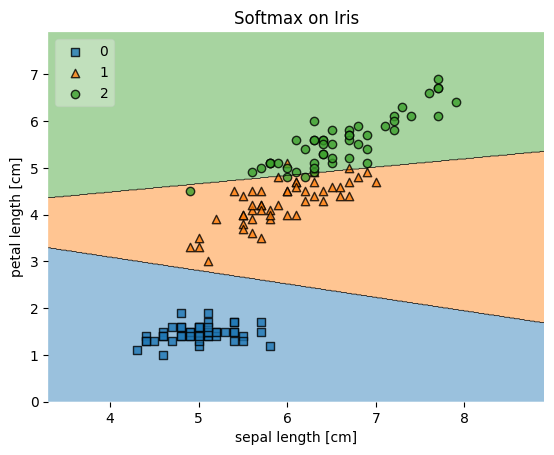

In [20]:
# Select only 2 features for plotting
X_plot = X[['sepal_length', 'petal_length']]  # Choose any 2 features

# Train the classifier on the same 2 features
clf.fit(X_plot, y)

# Plot decision regions
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_plot.values, y.values, clf=clf, legend=2)

# Add labels and title
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')  # <-- Corrected here
plt.title('Softmax on Iris')
plt.show()
